In [1]:
!pip install seaborn
!pip install scipy


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the data

In [4]:
fan_data = pd.read_csv('C:/EDA-Project-DATA/fandango_scrape.csv')

In [5]:
fan_data.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fan_data.shape

(504, 4)

In [7]:
fan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
fan_data.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## VISUALIZE THE DATA

<AxesSubplot: xlabel='RATING', ylabel='VOTES'>

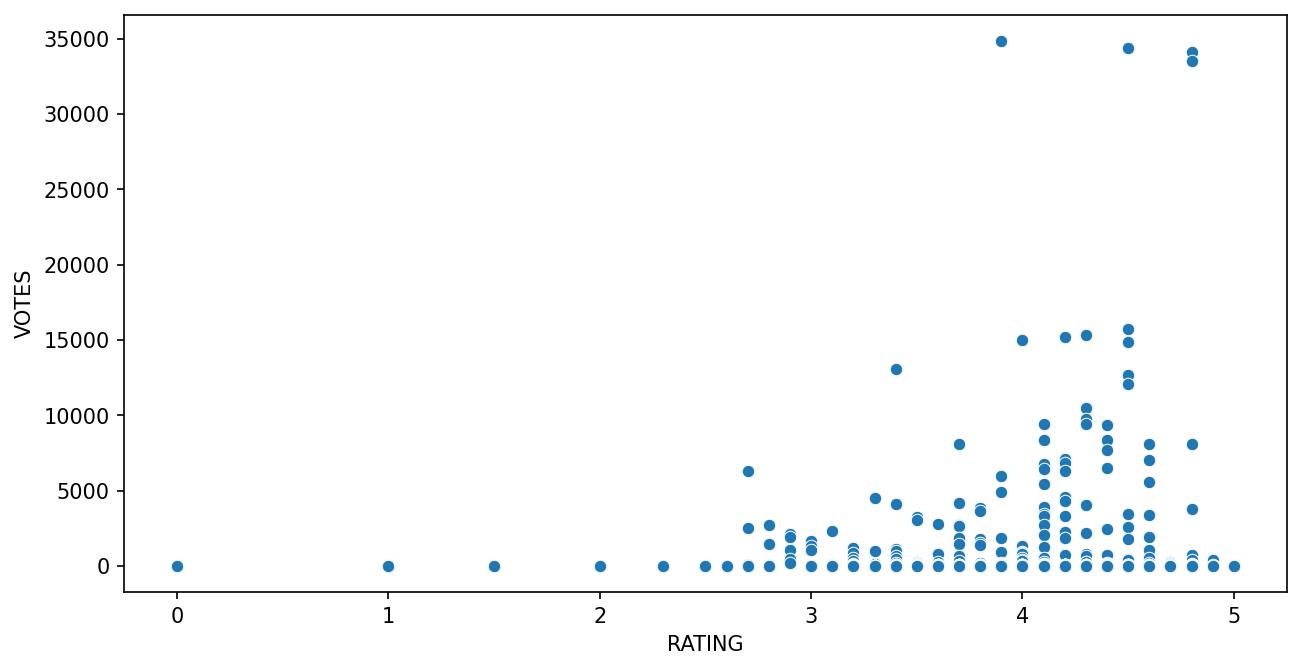

In [9]:
plt.figure(figsize=(10,5),dpi=150)     # dpi the resolution of an image i:e the no. of printed dots in one inch.
sns.scatterplot(data=fan_data, x='RATING', y='VOTES')          # scatter is always made in between two blocks.

In [10]:
fan_data.corr()

C:\Users\nishant thakur\AppData\Local\Temp\ipykernel_5804\2560273337.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fan_data.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


## TASK 1: STRIP NAME COLOUMN INTO YEAR AND FILM NAME.

In [11]:
# means to seperate or split the coloumn and film name from each other...  here, split function is used.
# here, lambda function is used which helps us as lambda arguments : expression

fan_data['YEAR'] = fan_data['FILM'].apply(lambda title: title.split('(')[-1]) 
#title.split(')')[0])   for bracket coming after year. 
#'(' this denotes the film name, bracket, then its year

In [12]:
fan_data

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964)


In [13]:
fan_data['YEAR'].value_counts()

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

## TASK 2:

### VISUALISE THE COUNT

<AxesSubplot: xlabel='YEAR', ylabel='count'>

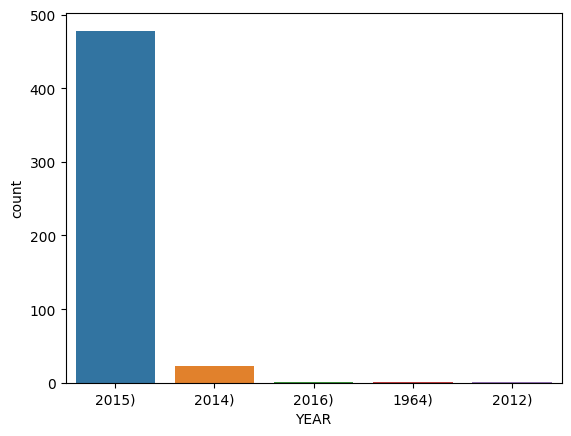

In [14]:
sns.countplot(data=fan_data,x ='YEAR')

## TASK 3: 10 MOVIES WITH HIGHEST NUMBER OF VOTES

In [15]:
# HERE FOR DO THIS TASK WE HAVE TO DO SORTING IN VOTES WHICH IS GIVEN TO FILMS...AND SORTING IS OF FROM HIGHEST ORDER.

fan_data.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


In [16]:
no_votes = fan_data['VOTES']==0
no_votes.sum()        # here, their are 69 total movies which have 0 votes

69

## TASK 4: MAKE A DATAFRAME HAVING GREATER THAN 0 VOTES 

In [17]:
fan_reveiwed =  fan_data[fan_data["VOTES"]>0]

In [18]:
fan_reveiwed

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015)
431,The Intern (2015),5.0,5.0,1,2015)
432,The Park Bench (2015),5.0,5.0,1,2015)
433,The Wanted 18 (2015),5.0,5.0,1,2015)


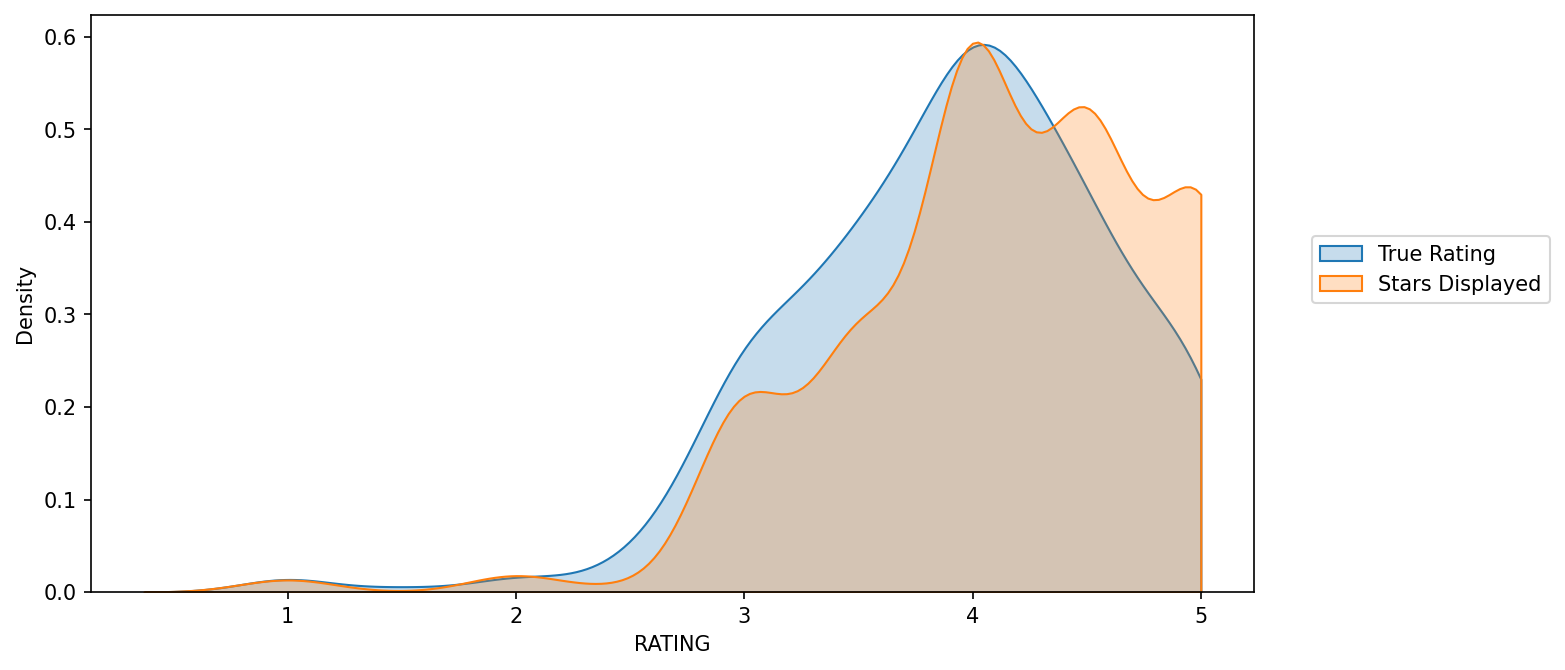

In [19]:
# here we do distribution between the stars and rating

plt.figure(figsize=(10,5),dpi=150)
sns.kdeplot(data=fan_reveiwed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reveiwed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

## TASK 5: WE WILL QUANTIFY THE DISCREPENSIES BETWEEN TRUE RATING AND STARS DISPLAYED 

In [20]:
fan_reveiwed['Rating_diff'] = fan_reveiwed['STARS'] - fan_reveiwed['RATING']
fan_reveiwed['Rating_diff'] = fan_reveiwed['Rating_diff'].round(2)

C:\Users\nishant thakur\AppData\Local\Temp\ipykernel_5804\4161217125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reveiwed['Rating_diff'] = fan_reveiwed['STARS'] - fan_reveiwed['RATING']
C:\Users\nishant thakur\AppData\Local\Temp\ipykernel_5804\4161217125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reveiwed['Rating_diff'] = fan_reveiwed['Rating_diff'].round(2)


In [21]:
fan_reveiwed

,FILM,STARS,RATING,VOTES,YEAR,Rating_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


# TASK 6: CREATE A PLOT FOR DISPLAYING THE NO. OF TIMES CERTAIN DIFFERENCES HAVE OCCURED

<AxesSubplot: xlabel='Rating_diff', ylabel='count'>

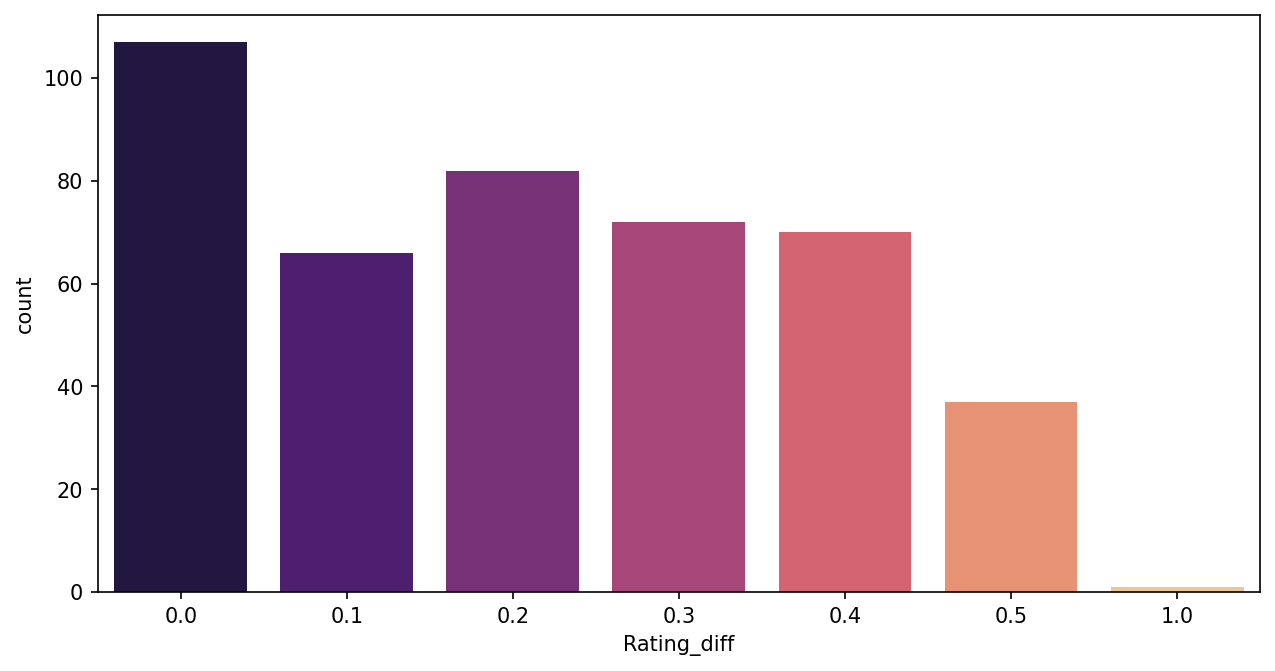

In [22]:
plt.figure(figsize=(10,5),dpi=150)
sns.countplot(data=fan_reveiwed,x ='Rating_diff', palette = 'magma')

In [23]:
fan_reveiwed[fan_reveiwed['Rating_diff']==1]   # check the movies having the difference of 1 between stars and rating.

,FILM,STARS,RATING,VOTES,YEAR,Rating_diff
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


## now we do work on all other sites data that is the second file we have

In [24]:
all_data = pd.read_csv('C:/EDA-Project-DATA/all_sites_scores.csv')

In [25]:
all_data

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [26]:
all_data.shape

(146, 8)

In [27]:
all_data.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [29]:
all_data.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

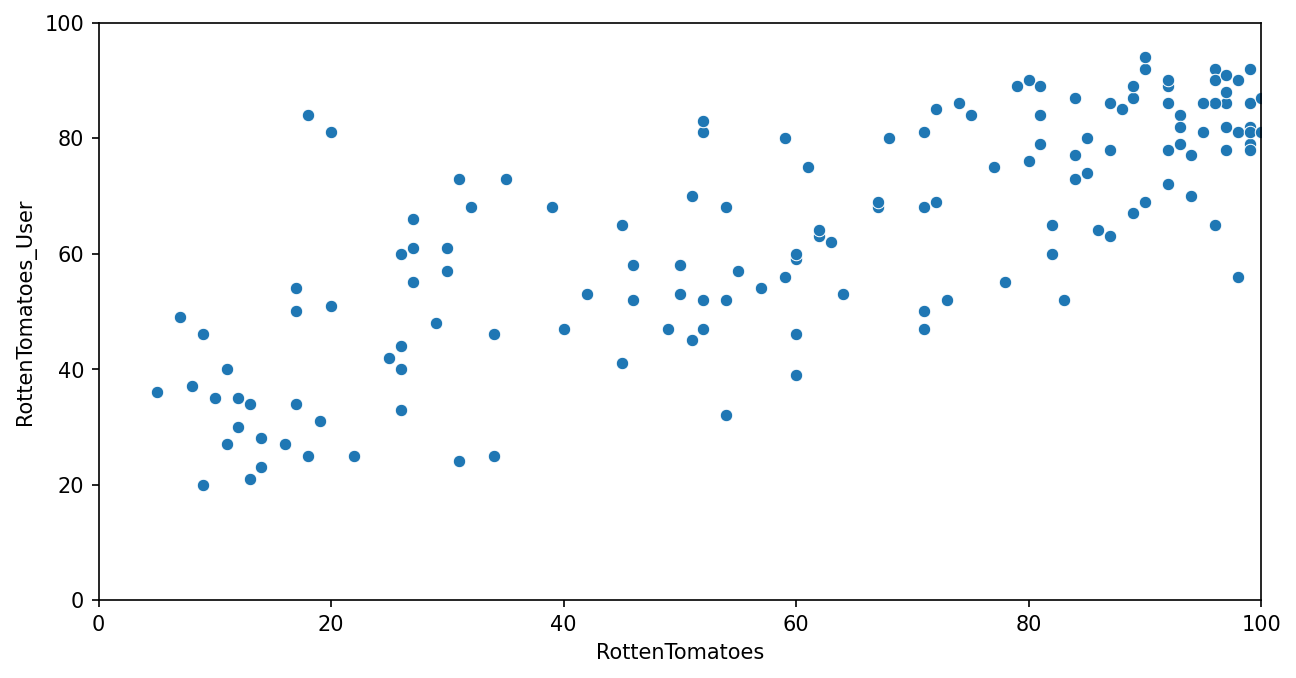

In [30]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=all_data, x='RottenTomatoes', y ='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

## TASK 7: DIFFERENCE BETWEEN RT CRITIC REVIEW AND USED REVIEW

In [31]:
all_data['Rotten_diff'] = all_data['RottenTomatoes'] - all_data['RottenTomatoes_User']

In [32]:
all_data

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [33]:
all_data['Rotten_diff'].apply(abs).mean()   # TASK 8: MEAN FOR ROTTEN_DIFF

15.095890410958905

Text(0.5, 1.0, 'Difference of critic and user review')

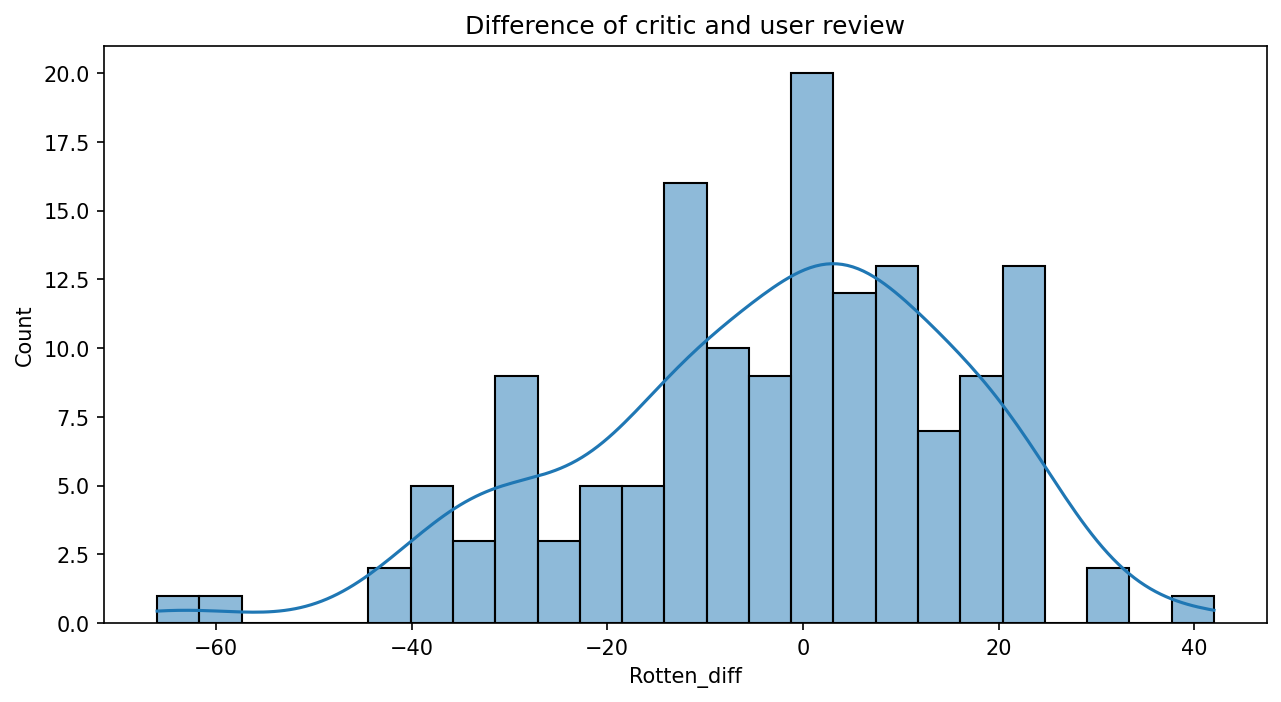

In [34]:
plt.figure(figsize=(10,5),dpi=150)
sns.histplot(data=all_data, x='Rotten_diff', kde=True, bins=25)
plt.title('Difference of critic and user review')

In [35]:
all_data['Rotten_diff'].apply(abs)

0      12
1       5
2      10
3      66
4      14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_diff, Length: 146, dtype: int64

Text(0.5, 1.0, ' Abs Difference of critic and user review')

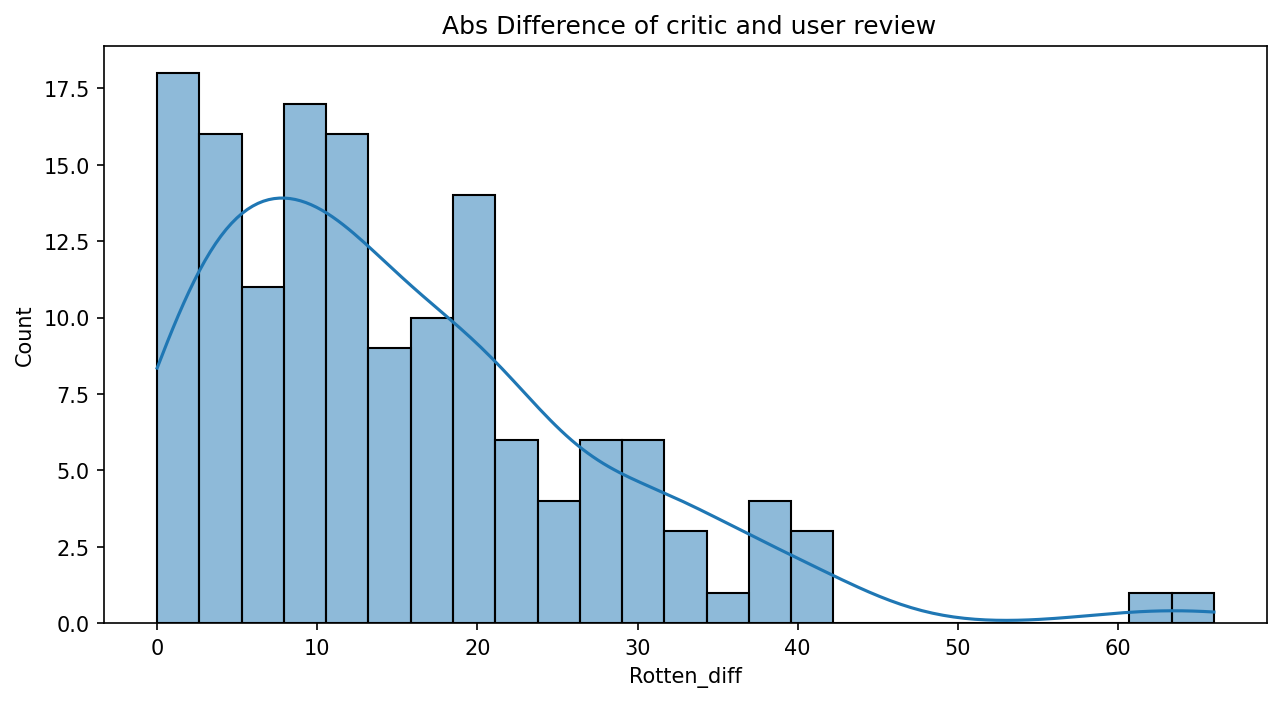

In [36]:
plt.figure(figsize=(10,5),dpi=150)
sns.histplot(data=all_data, x=all_data['Rotten_diff'].apply(abs), kde=True, bins=25)  # this is the graph for absolute.
plt.title(' Abs Difference of critic and user review')

In [55]:
print('users love this movie but critics hated there movie')
all_data.nsmallest(5,'Rotten_diff')[['FILM', 'Rotten_diff']]



users love this movie but critics hated there movie


,FILM,Rotten_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [38]:
print('users hated these movie but critics loved these movies')
all_data.nlargest(5, 'Rotten_diff')[['FILM', 'Rotten_diff']]

users hated these movie but critics loved these movies


,FILM,Rotten_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


(0.0, 10.0)

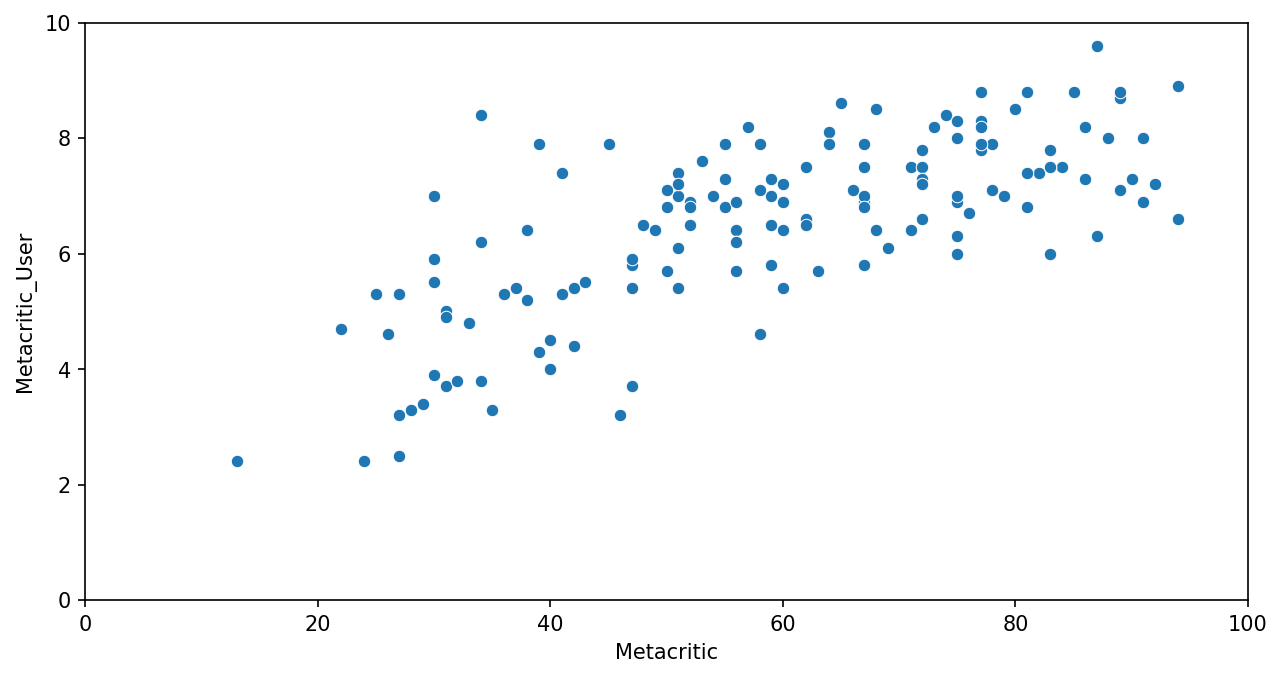

In [39]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=all_data, x='Metacritic', y ='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<AxesSubplot: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

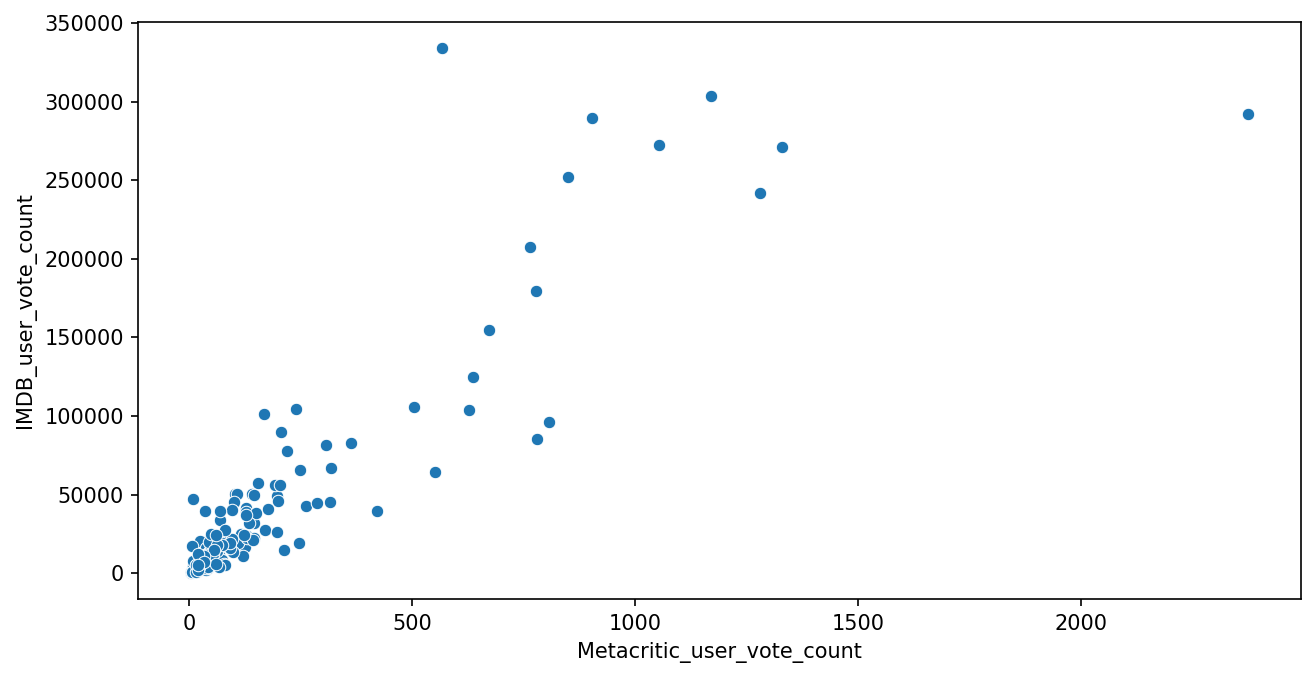

In [40]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=all_data,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [41]:
all_data.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [42]:
all_data.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [43]:
#combine and merge the fandango and other data sites. here merging is inner and the merging is doing according to the name of film.

df_cmbnd = pd.merge(fan_data, all_data,on = 'FILM',how='inner')

In [44]:
df_cmbnd

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015),87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015),95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015),93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015),95,86,86,7.3,7.4,14,696,9


In [45]:
df_cmbnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [46]:
df_cmbnd.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


## TASK 9: NORMALISE THE DATA BY MULTIPLYING

In [47]:
df_cmbnd["RT_NOR"] = np.round(df_cmbnd['RottenTomatoes']/20,1)
df_cmbnd["RTU_NOR"] = np.round(df_cmbnd['RottenTomatoes_User']/20,1)

In [48]:
df_cmbnd["MET_NOR"] = np.round(df_cmbnd['Metacritic']/20,1)
df_cmbnd["METU_NOR"] = np.round(df_cmbnd['Metacritic_User']/2,1)

In [49]:
df_cmbnd["IMDB_NOR"] = np.round(df_cmbnd['IMDB']/2,1)

In [50]:
df_cmbnd

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff,RT_NOR,RTU_NOR,MET_NOR,METU_NOR,IMDB_NOR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015),87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015),95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015),93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015),95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [51]:
norm_score = df_cmbnd[['STARS', 'RATING', 'RT_NOR', 'RTU_NOR', 'MET_NOR', 'METU_NOR', 'IMDB_NOR']]

In [52]:
norm_score.head()

,STARS,RATING,RT_NOR,RTU_NOR,MET_NOR,METU_NOR,IMDB_NOR
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


C:\Users\nishant thakur\AppData\Local\Temp\ipykernel_5804\2501658541.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_score,clip=[0,5],shade=True,palette = 'Set1')


NameError: name 'ax' is not defined

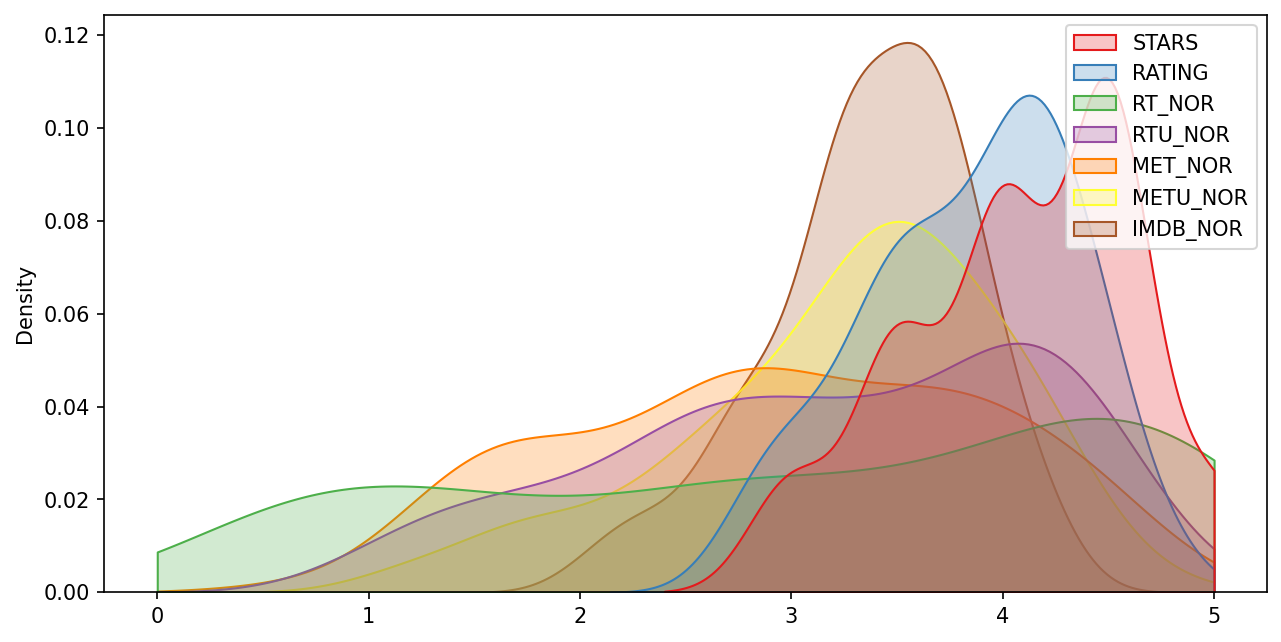

In [69]:
def leg(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles,labels, loc=new_loc, title=title, **kws)
    
    
plt.figure(figsize=(10,5),dpi=150)
sns.kdeplot(data=norm_score,clip=[0,5],shade=True,palette = 'Set1')

leg(ax, "upper left")

<AxesSubplot: ylabel='Count'>

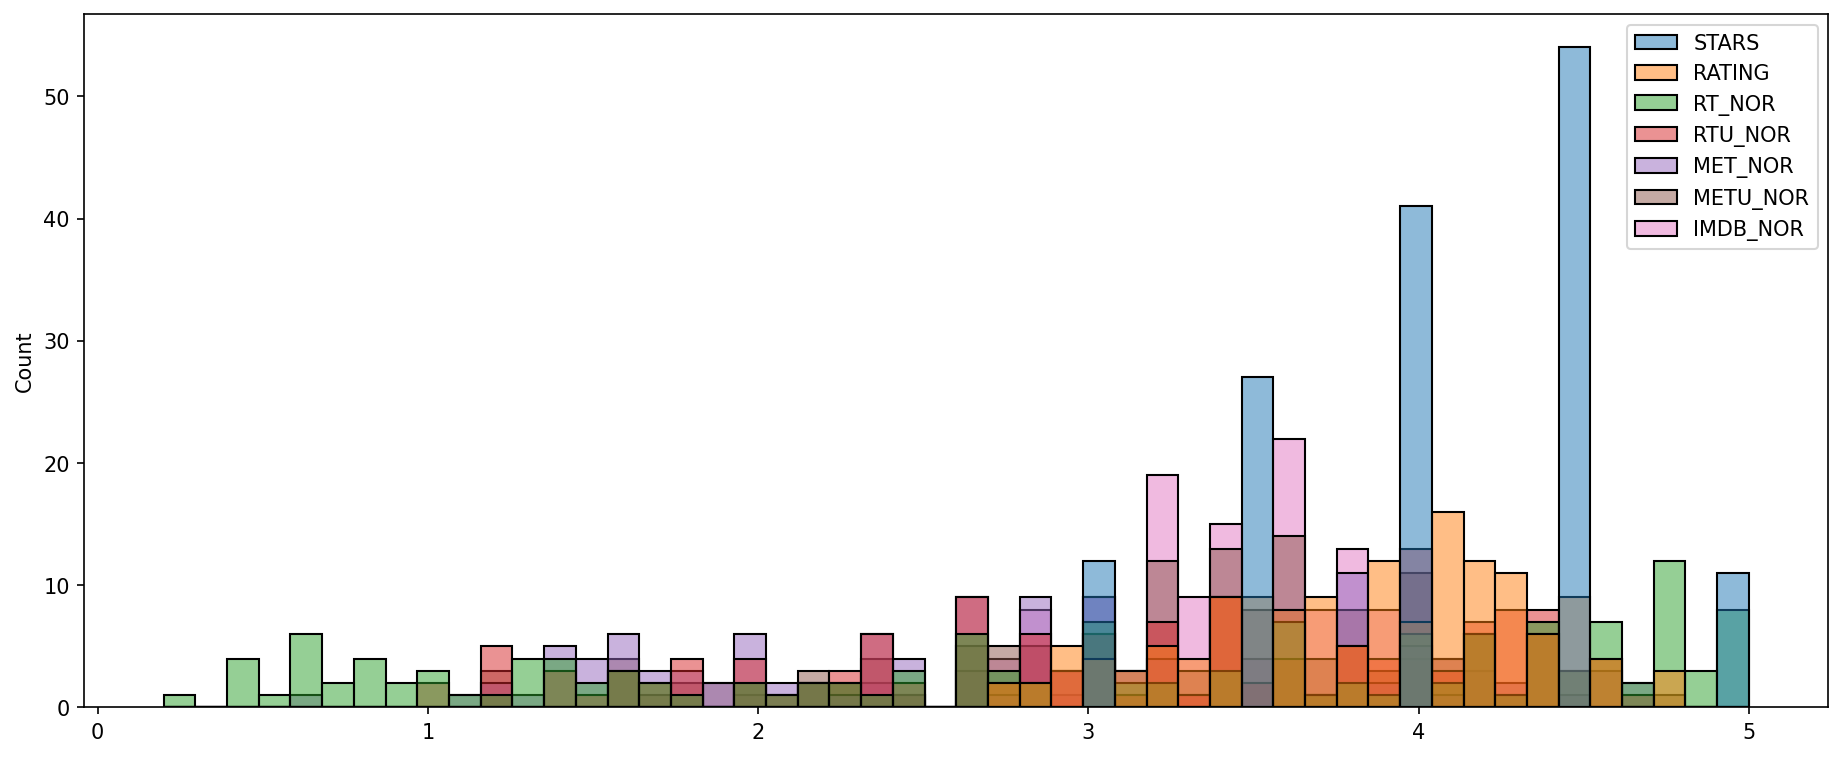

In [58]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_score, bins=50)

In [59]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


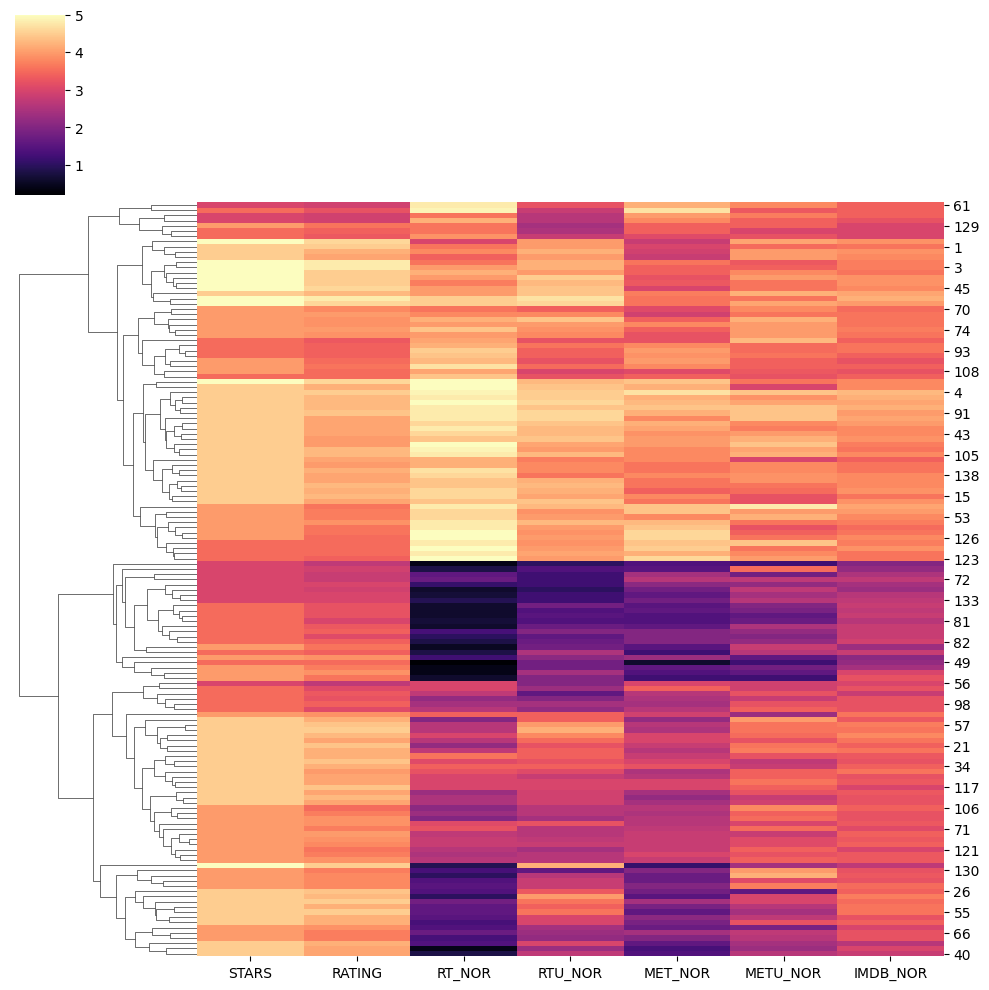

In [60]:
sns.clustermap(norm_score,cmap='magma',col_cluster = False)

In [61]:
norm_score

,STARS,RATING,RT_NOR,RTU_NOR,MET_NOR,METU_NOR,IMDB_NOR
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [62]:
norm_films = df_cmbnd[['STARS', 'RATING', 'RT_NOR', 'RTU_NOR', 'MET_NOR', 'METU_NOR', 'IMDB_NOR','FILM']]

In [63]:
norm_films

,STARS,RATING,RT_NOR,RTU_NOR,MET_NOR,METU_NOR,IMDB_NOR,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4,"Kumiko, The Treasure Hunter (2015)"
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5,The Diary of a Teenage Girl (2015)
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9,The Wrecking Crew (2015)
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7,Tangerine (2015)


In [64]:
norm_films.iloc[25]

STARS                  4.5
RATING                 4.1
RT_NOR                 0.4
RTU_NOR                2.3
MET_NOR                1.3
METU_NOR               2.3
IMDB_NOR               3.0
FILM        Taken 3 (2015)
Name: 25, dtype: object